<a href="https://colab.research.google.com/github/JanghyukChoi/ML-Deeplearning-Basic/blob/main/Machine%20Learning/Machine_Learning_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**선형 회귀로 훈련 세트 범위 밖의 샘플 예측**

In [ ]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )
from sklearn.model_selection import train_test_split #25% 비율로 test data & practice data를 분배해줌

train_input, test_input, train_target, test_target = train_test_split(perch_length,perch_weight,random_state=42)
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

from sklearn.neighbors import KNeighborsRegressor
#k-최근접 이웃 회귀의 한계: data 이외에 존재하는 값들은 정확한 측정이 불가능
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input,train_target)
print(knr.predict([[50]]))

[1033.33333333]


[1241.83860323]
[39.01714496] -709.0186449535477


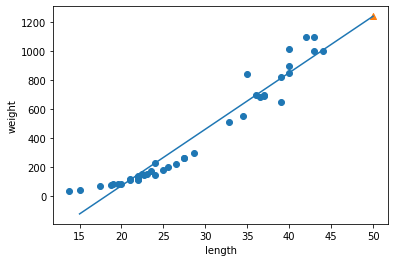

0.939846333997604
0.8247503123313558


In [ ]:
#선형 회귀 그래프: 1차 함수
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
lr = LinearRegression()
lr.fit(train_input,train_target)
print(lr.predict([[50]]))
print(lr.coef_,lr.intercept_)
plt.scatter(train_input, train_target)
plt.plot([15,50],[15*lr.coef_ + lr.intercept_, 50*lr.coef_+lr.intercept_]) #x=15,y=15x39-709 와 x=50, y=50x39-709 두점을 잇는다.
plt.scatter(50,1241.8,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))

과소적합이다. 더 정교한 모델이 필요함.

In [ ]:
#다항 회귀

train_poly = np.column_stack((train_input**2,train_input)) #길이의 제곱을 추가해준다
test_poly = np.column_stack((test_input**2,test_input))
lr=LinearRegression()
lr.fit(train_poly,train_target)
print(lr.predict([[13.7**2,13.7]]))

[11.08663218]


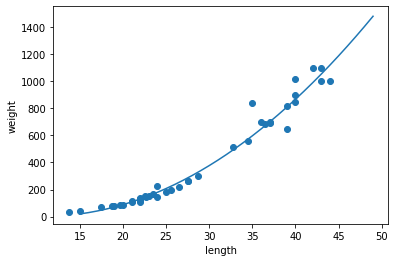

In [ ]:
point = np.arange(15,50)
plt.scatter(train_input,train_target) #훈련 세트의 산점도를 그린다
plt.plot(point,1.01*point**2-21.6*point+116.05) #1 씩 증가시키며 그래프 그린다
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
#R^2 확인하기
print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))

0.9706807451768623
0.9775935108325122


과소적합이다. 더 정교한 모델이 필요함.

## Chapter 03-3 특성 공학과 규제

해결책: 여러개의 특성을 사용한 선형 회귀를 다중회귀라고 부른다.
길이뿐만 아니라 농어의 높이와 두께도 함계 사용해야된다. 또한 이전 절에서처럼 3개의 특성을 각각 제곱해서 추가한다. 우리는 이런 작업을 특성 공학이라고 한다.


In [ ]:
#판다스는 유명한 데이터 분석 라이브러리다. 데이터프레임은 판다스의 핵심 데이터 구조다. 넘파이 대신 판다스를 이용하는 이유는 인터넷에서 데이터를 바로 다운로드하여 사용하고 싶기 때문이다.

import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target = train_test_split(perch_full,perch_weight,random_state=42) #샘플 개수를 42개로 규제했다

#PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures
poly= PolynomialFeatures(include_bias=False) #include_bias=False 는 1 값을 제외시키는 것.
poly.fit([[2,3]]) #타깃값이 필요하지 않다
print(poly.transform([[2,3]])) #기본적으로 각 특성을 제곱한 항을 추가하고 특성끼리 서로 곱한 항을 추가한다

[[2. 3. 4. 6. 9.]]


In [ ]:
poly= PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 9)


In [ ]:
#9개의 특성이 각각 어떤 입력의 조합으로 만들어졌는지 알려준다
poly.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [ ]:
lr=LinearRegression()
lr.fit(train_poly,train_target)
print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))
#과소적합은 없어졌다!

0.9903183436982124
0.9714559911594134


특성을 더 추가하면 어떻게 될까? 제곱근 이외에 3제곱, 4제곱, 5제곱 항까지 넣는다.

In [ ]:
poly = PolynomialFeatures(degree=4,include_bias=False)
poly.fit(train_input)
predict = poly.transform([[13.7,3.53,2.0]])
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
lr.fit(train_poly,train_target)
print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))

0.9995286898074609
-6.7866969165723585


`이런 모델은 훈련 세트에 너무 과대적합되므로 테스트 세트에서는 형편없는 점수를 만든다. `

In [ ]:
#정규화 시키기
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
predict_scaled = ss.transform(predict)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

# 릿지 회귀

릿지와 라쏘에 대해서 알기 전에 정규화를 제대로 알아야 한다.
왼쪽 그림은 underfitted, 즉 테스트 데이터를 위한 학습을 덜 된 것이다.
오른쪽 그림은 너무 train 데이터에 치우쳐서 테스트 데이터에서 오차가 발생한 것이다.

두번째 그림이 가장 좋은 모델이라고 말할 수 있습니다. 어느정도 데이터에 적합하면서 bias와 variance에 대해서도 적절합니다. bias와 variance는 모델의 loss 또는 error를 의미합니다.

모델을 만들 때, bias와 variance를 둘 다 줄여주면 제일 좋겠지만 하나를 포기해야 하는 경우도 발생합니다. 이때 bias를 조금 가지더라도 제일 작은 variance를 가지는 모델을 만드는 것도 좋지않을까?

다시말해 overfitting을 해결함으로써 효과를 볼 수 있지 않을까?

결국 overfitted 인 그래프는 bias가 크지만 variance가 작다.



# Overfitting을 해결하는 방법은 크게 두 가지로 볼 수 있습니다.

1. 특성(Feature)의 갯수를 줄여기

주요 특징을 직접 선택하고 나머지는 버린다.
Model selection algorithm을 사용한다.

2. 정규화(Regularization)를 수행한다.

모든 특성을 사용하되, 파라미터(세타)의 값을 줄인다.

### **근데 정규화가 뭘까?**

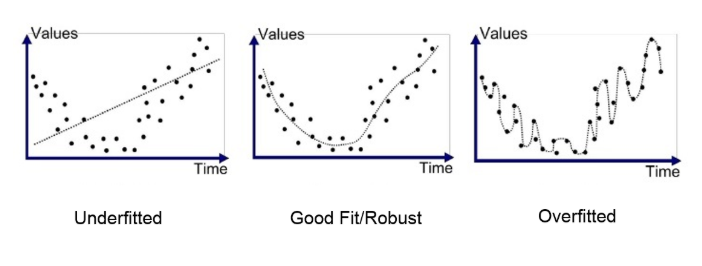

## 정규화(Regularization)

오른쪽에서 가운데로 그래프를 만들어야되는데, 여러가지 방법이 있습니다. 그 중 한가지 방법이 릿지 회귀입니다.

###Ridge Regression (릿지 회귀, L2 Regression)



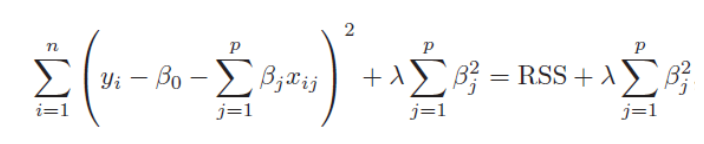

제곱합을 최소화 하기 때문에 계수의 크가 줄어듬 => 과적합이 방지됨

In [ ]:
#릿지 회귀 활용하기

from sklearn.linear_model import Ridge
ridge= Ridge()
ridge.fit(train_scaled,train_target)
print(ridge.score(train_scaled,train_target))
print(ridge.score(test_scaled,test_target))

0.9894514463415389
0.9791864810411214


테스트 세트 점수가 정상으로 돌아왔다.


릿지를 사용할때 규제의 양을 임의로 조절할 수 있다. 모델 객체를 만들 때 alpha 매개변수로 규제의 강도를 조절한다. 이 alpha 값은 모델이 저절로 학습하는게 아니라 사전에 직접 입력해줘야한다.

적절한 값을 찾는 방법? -> alpha 값에 대한 R^2 값의 그래프를 그려보는 것이다. 훈련 세트와 테스트 세트의 점수가 가장 가까운 지점이

최적의 알파값이 된다.



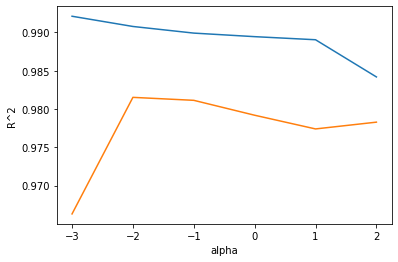

In [ ]:
import matplotlib.pyplot as plt
train_score = []
test_score = []
alpha_list = [0.001,0.01,0.1,1,10,100]

for alpha in alpha_list:
  ridge = Ridge(alpha=alpha)
  ridge.fit(train_scaled,train_target)
  train_score.append(ridge.score(train_scaled,train_target))
  test_score.append(ridge.score(test_scaled,test_target))

plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()
#alpha값을 0.1로 해서 최종 모델을 훈련한다

In [ ]:
ridge = Ridge(alpha=0.01)
ridge.fit(train_scaled,train_target)
print(ridge.score(train_scaled,train_target))
print(ridge.score(test_scaled,test_target))
print(ridge.predict(predict_scaled)) #weight = 26.6624 로 predict

0.9907820655909814
0.9815218258396892
[26.66246279]


# 04-1 로지스틱 회귀

k-최근접 이웃은 주변 이웃을 찾아주니까 이웃의 클래스 비율을 확률이라고 출력하면 되지 않을까?

In [ ]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
print(pd.unique(fish['Species'])) #unique() 함수는 해당 열에서 하나뿐인 값들만 추출한다
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy() #input 값은 2차원 배열이어야한다
fish_target = fish['Species'].to_numpy() #target 값은 1차원 배열이어야한다. 타깃 데이터에 2개 이상의 클래스가 포함된 문제를 다중 분류라고 부릅니다.
from sklearn.model_selection import train_test_split
train_input ,test_input,train_target,test_target = train_test_split(fish_input,fish_target,random_state=42)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input) #정규화시키기

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled,train_target)
print(kn.score(train_scaled,train_target))
print(kn.score(test_scaled,test_target))

0.8907563025210085
0.85


In [ ]:
#KNeighborsClassifier에서 정렬된 타깃값은 classes_ 속성에 저장되어 있습니다
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
import numpy as np
print(kn.classes_)
proba = kn.predict_proba(test_scaled[:5]) #클래스별 확률값을 반환한다
print(np.round(proba,decimals=4))

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [ ]:
distances,indexes = kn.kneighbors(test_scaled[3:4]) #넘파이 배열의 슬라이싱 연산자를 사용하면 자동으로 2차원 배열이 생성된다
print(train_target[indexes]) #결과값이 동일하다!

[['Roach' 'Perch' 'Perch']]


하지만 이렇게 하게되면 가능한 확률은 0/3,1/3,2/3,3/3 밖에 없다. 한계가 있기 때문에 더 좋은 방법을 찾아야 할 것 같다.



## 로지스틱 회귀

로지스틱 회귀(Logistic Regression)는 회귀를 사용하여 데이터가 어떤 범주에 속할 확률을 0에서 1 사이의 값으로 예측하고 그 확률에 따라 가능성이 더 높은 범주에 속하는 것으로 분류해주는 지도 학습 알고리즘이다. 로지스틱 회귀는 분류모델이다.


###분류 모델 vs 회귀 모델

지도학습은 크게 ‘회귀’와 ‘분류’로 나뉩니다.
회귀는 영어로 Regression이고, 분류는 Classification입니다.
예측하고 싶은 종속변수가 숫자일 때 보통 회귀라는 머신러닝의 방법을 사용합니다.
레모네이드 예제가 바로 회귀를 이용한 것입니다.

반대로 어떤떤 문제를 만났는데
그 문제에서 추측하고 싶은 결과가
이름 혹은 문자라면 분류를 이용하면 된다.

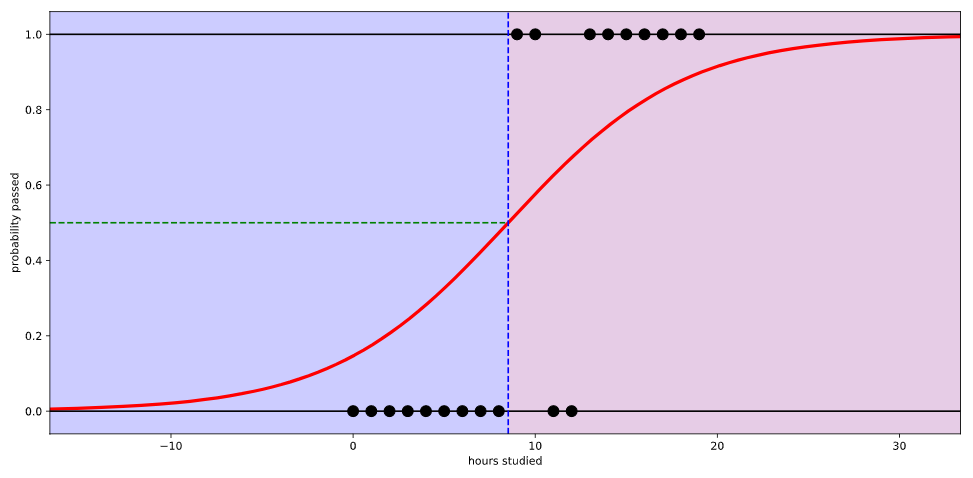

z가 0이 될 때는 0.5가 되죠. z가 어떤 값이 되더라도 '옴' 은 절대로 0에서1 사이의 범위를 벗어날 수 없다. 그렇다면 0에서 1 사이 값을 0~100% 까지 확률로 해석할 수 있겠군요. 넘파이를 사용하면 그래프를 간단히 그릴 수 있다.





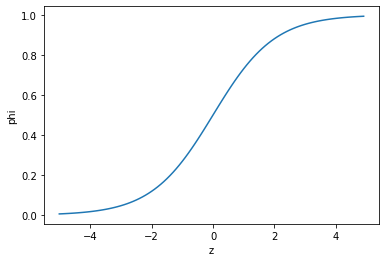

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5,5,0.1)
phi = 1 / (1+np.exp(-z))
plt.plot(z,phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

In [ ]:
#우선 간단한 이진 분류를 수행해보자.

bream_smelt_indexes = (train_target=='Bream') | (train_target=='Smelt') #도미와 빙어만 True값으로 나오도록 설정
train_bream_smelt = train_scaled[bream_smelt_indexes] #Boolean Indexing 적용
target_bream_smelt = train_target[bream_smelt_indexes]
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt,target_bream_smelt)
print(lr.coef_.shape,lr.intercept_.shape)

(1, 5) (1,)


따라서 이 로지스틱 회귀 모델이 학습한 방정식은 다음과 같습니다.

z = -0.404 * Weight - 0.576 * Length - 0.663 * Diagonal - 1.013 * Height - 0.732 * Width - 2.161

In [ ]:
#z값 자동으로 계산해주는 메서드
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)
#z값을 활용해 확률을 계산해주는 메서드 -> 시그모이드 함수
from scipy.special import expit
print(expit(decisions)) #이게 어떤 확률인가? -> 양성 클래스(빙어)에 대한 확률

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]
[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


## 로지스틱 회귀로 다중 분류 수행하기

앞에서 이진 분류를 위해 로지스틱 회귀 모델을 훈련시켜 보았습니다. 다중 분류도 크게 다르지 않습니다. 여기에서도 LogisticRegression 클래스를 사용해 7개의 생선을 분류해 보면서 이진 분류와의 차이점을 알아보겠습니다.

In [ ]:
lr = LogisticRegression(C=20,max_iter=1000) #계수의 제곱을 규제하는데, 이를 C라고 한다
lr.fit(train_scaled,train_target)
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

0.9327731092436975
0.925


In [ ]:
proba = lr.predict_proba(test_scaled[:10])
print(np.round(proba,decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]
 [0.999 0.    0.    0.    0.    0.    0.   ]
 [0.    0.001 0.05  0.    0.004 0.945 0.   ]
 [0.001 0.007 0.32  0.015 0.638 0.001 0.018]
 [0.    0.002 0.802 0.002 0.182 0.    0.011]
 [0.    0.    0.023 0.977 0.    0.    0.   ]]


이 데이터는 5개의 특성을 사용하므로 계수의 열이 5개다. 그런데 생선 종류가 7개이기 때문에 행이 7개다. 이 뜻은 이진 분류에서 보았던 z를 7개나 계산한다는 의미이다. 다중 분류는 클래스마다 z값을 하나씩 계산한다. 당연히 가장 높은 z값을 출력하는 클래스가 예측 클래스가 된다.

그럼 확률은 어떻게 계산된걸까? -> 이진 분류에서는 시그모이드 함수를 사용해 z를 0과 1사이의 값으로 변환했지만, 다중 분류에서는 소프트맥스 함수를 사용해서 7개의 z값을 확률로 변환한다.

Softmax(소프트맥스)는 입력받은 값을 출력으로 0~1사이의 값으로 모두 정규화하며 출력 값들의 총합은 항상 1이 되는 특성을 가진 함수이다.

분류하고 싶은 클래수의 수 만큼 출력으로 구성한다.

가장 큰 출력 값을 부여받은 클래스가 확률이 가장 높은 것으로 이용된다.



In [ ]:
#이진 분류에서처럼 decision_function() 메서드로 z1~z7까지의 값을 구한 다음 소프트맥스 함수를 사용해 확률로 바꾸어 보도록 하자
decision = lr.decision_function(test_scaled[:5])
from scipy.special import softmax
proba = softmax(decision,axis=1)
print(np.round(proba,decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


###Code 모아보기

In [ ]:
#로지스틱 회귀로 다중 분류 수행하기
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input,fish_target,random_state=42)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)
lr = LogisticRegression(C=20,max_iter=1000) #계수의 제곱을 규제하는데, 이를 C라고 한다
lr.fit(train_scaled,train_target)
decision = lr.decision_function(test_scaled[:5])
from scipy.special import softmax
proba = softmax(decision,axis=1)
print(np.round(proba,decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


## 확률적 경사 하강법

만약 모든 데이터를 한번에 훈련시키지 못하고 조금씩 훈련시켜야할 경우, 어떻게 해야될까?

앞서 훈련한 모델들을 버리지 않도 새로운 데이터에 대해서만 조금씩 더 훈련하기 위해 '점진적 학습'을 수행한다. 대표적인 점진적 학습 알고리즘은 확률적 경사 하강법이다.  우선 '경사 하강법'에 대해서부터 알아보자.

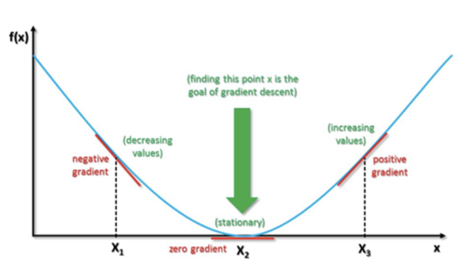

경사 하강법은 손실(cost)을 줄이는 알고리즘.

함수의 기울기(경사)를 구하여 기울기가 낮은 쪽으로 계속 이동시켜 극값(최적값)에 이를 때까지 반복하는 것.

미분 값(기울기)이 최소가 되는 점을 찾아 알맞은 weight(가중치 매개변수)를 찾아냄.


경사하강법에서는 학습시 스텝의 크기(step size) 중요.

학습률이 너무 작을 경우, (step size가 작을 수록)

알고리즘이 수렴하기 위해 반복해야 하는 값이 많으므로 학습시간이 오래걸림.
지역 최소값(local minimum)에 수렴할 수 있음.
학습률이 너무 클 경우, (step size가 클수록)

학습 시간은 적게 걸림.
스텝이 너무 커서 전역 최소값(global minimum)을 가로질러 반대편으로 건너뛰어 최소값에서 멀어질 수 있음.



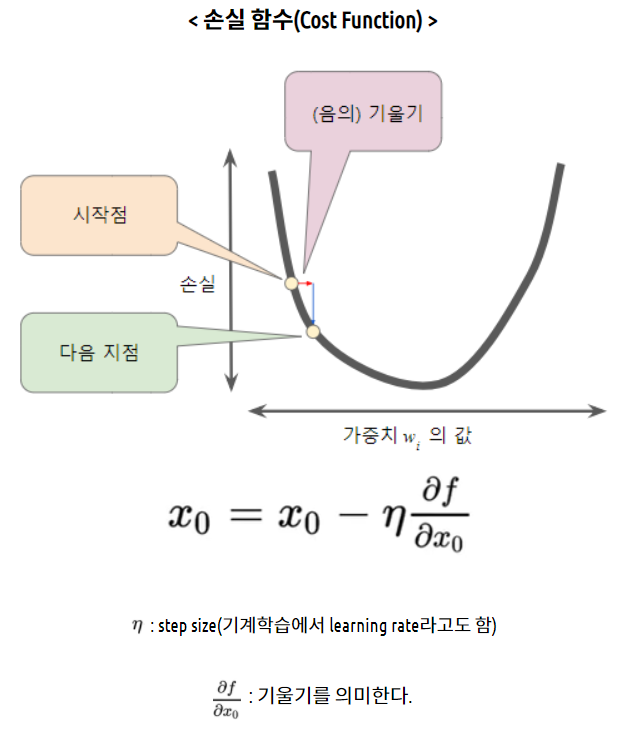

경사하강법은 전체 데이터를 모두 사용해서 기울기를 계산(Batch Gradient Descent)하기 때문에 학습하는데 많은 시간이 필요함. -> 학습데이터가 큰 경우 부담 있음.

만약, 10만개의 데이터가 있을 때, 데이터에 업데이트가 있을 때마다 10만번의 계산을 해야함.
이러한 점을 보완하기 위해 확률적 경사하강법 사용.

매 step에서 딱 한개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 기울기 계산.

배치 크기가 1인 경사하강법 알고리즘.



In [ ]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input,fish_target,random_state=42)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)
from sklearn.linear_model import SGDClassifier #사이킷런에서 확률적 경사 하강법을 제공하는 대표적인 분류용 클래스
sc = SGDClassifier(loss='log',max_iter=10,random_state=42) #max_iter은 최대 수행할 에포크 횟수
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))


0.773109243697479
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


출력된 훈련 세트와 테스트 세트 정확도가 낮다. 아마도 지정한 반복 횟수 10번이 부족한 것으로 보인다! 앞서 이야기 한 것 처럼 확률적 경사 하강법은 점진적 학습이 가능하다. 모델을 이어서 훈련할 때는 partial_fit() 메서드를 사용한다.

In [ ]:
sc.partial_fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.8151260504201681
0.85


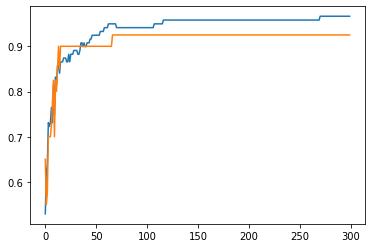

In [ ]:
#전체 코드 모아보기
import numpy as np
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input,fish_target,random_state=42)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)
from sklearn.linear_model import SGDClassifier
sc=SGDClassifier(loss='log',random_state=42)
train_score=[]
test_score=[]
classes = np.unique(train_target)
for _ in range(0,300):
  sc.partial_fit(train_scaled,train_target,classes=classes)
  train_score.append(sc.score(train_scaled,train_target))
  test_score.append(sc.score(test_scaled,test_target))
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.show()

In [ ]:
sc = SGDClassifier(loss='log',max_iter=100,tol=None,random_state=42)
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.957983193277311
0.925


## 로지스틱 회귀


z가 아주 큰 음수일 때